# Øvelse 3 - Aktier

I denne øvelse vil vi komme til at arbejde primært med varians, kovarians og korrelation. Disse er mål for hvordan variable bevæger sig. Varians fortæller os noget om hvordan en variabel svinger/ varierer. Kovarians og korrelation fortæller os noget om hvordan to variable bevæger sig i forhold til hinanden.

In [102]:
# Vi importerer de nødvendige libraries.
import pandas as pd # pandas for at arbejde med data.
import numpy as np # numpy for at lave udregninger.
import matplotlib.pyplot as plt # matplotlib.pyplot for at styre vores plots.
import seaborn as sns # seaborn for at lave plots.

sns.set()

In [103]:
# Vi importerer vores aktiedata
data = pd.read_csv('https://raw.githubusercontent.com/STLinde/Anvendt-Statistik/main/data.csv')
df = pd.DataFrame(data)

## 1: Overblik, Indledende Data Analyse

**NB: Skriv besvarelser og forklaringer på spørgsmålene i tekstboksene under hvert spørgsmål, efter i har skrevet den påkrævede kode og kørt den.**

Når man begynder at arbejde med ny data, så er det altid en god idé at skabe sig et overblik over dataen, for at vide hvad man arbejder med. I Øvelse 1 så vi hvordan man kan bruge `head()` og `info()` til at skabe sig et overblik.

In [104]:
# 1.1 Hvordan ser de første 5 rækker ud i dataen?
# 1.2: Hvilke aktier arbejder vi med?
df.head()

,Date,^GSPC,AAPL,MSFT,GOOG,KO,WFC,TSLA,BA,JNJ,AMZN,MCD
0,2011-08-31,1218.890015,11.800762,21.408432,269.469971,25.590088,19.507246,4.948,54.362091,49.467171,215.229996,67.959541
1,2011-09-01,1204.420044,11.684236,21.094543,265.255768,25.590088,18.857004,4.800,53.703514,49.113838,212.539993,67.703957
2,2011-09-02,1173.969971,11.470196,20.764568,261.440063,25.332180,18.087179,4.614,52.061085,48.166592,210.000000,66.967308
3,2011-09-06,1165.239990,11.644680,20.531164,260.115021,25.219580,17.877909,4.588,51.036629,48.595104,216.179993,66.764351
4,2011-09-07,1198.619995,11.773166,20.925533,266.017914,25.717211,18.655203,4.768,52.768471,49.189003,219.899994,67.117645


*1.1 SVAR:*
Vi har datoer i en kolonne og aktiepriser i de 11 resterende kolonner. 

*1.2 SVAR:*
^GSPC = S&P 500 index
AAPL = Apple
MSFT = Microsoft
GOOG = Google
KO = Coca Cola
WFC = Wells Fargo
TSLA = Tesla
BA = Boeing Airlines
JNJ = Johnson & Johnson
AMZN = Amazon
MCD = McDonald's

In [105]:
# 1.3: Hvilke datatyper indeholder dataen?
# 1.4: Mangler der noget data?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2515 non-null   object 
 1   ^GSPC   2515 non-null   float64
 2   AAPL    2515 non-null   float64
 3   MSFT    2515 non-null   float64
 4   GOOG    2515 non-null   float64
 5   KO      2515 non-null   float64
 6   WFC     2515 non-null   float64
 7   TSLA    2515 non-null   float64
 8   BA      2515 non-null   float64
 9   JNJ     2515 non-null   float64
 10  AMZN    2515 non-null   float64
 11  MCD     2515 non-null   float64
dtypes: float64(11), object(1)
memory usage: 235.9+ KB


*1.3 SVAR:*
Date er af object dtypen, og de resterende er float64, som er decimaltal.

*1.4 SVAR:*
Nej dataen er fuldstændig. 

Vi kan bruge `pd.to_datetime()` funktionen til at konvertere vores dato kolonne til data typen `datetime`.
Dette gør vi fordi det giver os mulighed for, at arbejde med datoer ud fra et kalenderperspektiv. Så vil vi kunne konvertere vores DataFrame til uger, måneder osv. 
Dette er også grunden til vi bruger det som index.

In [107]:
# 1.5 Konverter 'Date' kolonnen til datetime datatype:
df['Date'] = pd.to_datetime(df['Date'])

Vi kan bruge kolonnen `Date` som index via funktionen `df.set_index()`.

In [ ]:
# 1.6: Brug 'Date' kolonnen som index for vores DataFrame:
df.set_index('Date', inplace=True)

*1.7: Hvad er den første og sidste dato i vores DataFrame? SVAR:*

In [111]:
print("Første dato: ", df.index.min())
print("Sidste dato: ", df.index.max())

Første dato:  2011-08-31 00:00:00
Sidste dato:  2021-08-27 00:00:00


## 2: Varians, Kovarians, Korrelation

I dette afsnit kommer vi til kort at genbesøge varians, og derefter går vi over i udregningen af kovarians og korrelation. 

In [112]:
# 2.1: Udregn variansen for aktierne i datasættet. 
df.var()

^GSPC    571046.930981
AAPL       1162.610277
MSFT       4707.152943
GOOG     280987.060327
KO           66.146800
WFC          91.887329
TSLA      33405.197882
BA        10379.536671
JNJ        1093.715727
AMZN     969154.902009
MCD        2764.255288
dtype: float64

In [113]:
# 2.2: Udregn standardafvigelsen for aktierne i datasættet.
df.std()

^GSPC    755.676472
AAPL      34.097071
MSFT      68.608694
GOOG     530.082126
KO         8.133068
WFC        9.585788
TSLA     182.770889
BA       101.880011
JNJ       33.071373
AMZN     984.456653
MCD       52.576186
dtype: float64

Kovarians er et mål for hvor meget og hvordan to variable svinger sammen. Det vil sige covarians giver os et mål for hvordan en variabel bevæger sig når den anden variabel bevæger sig. 

<AxesSubplot:xlabel='AAPL', ylabel='MSFT'>

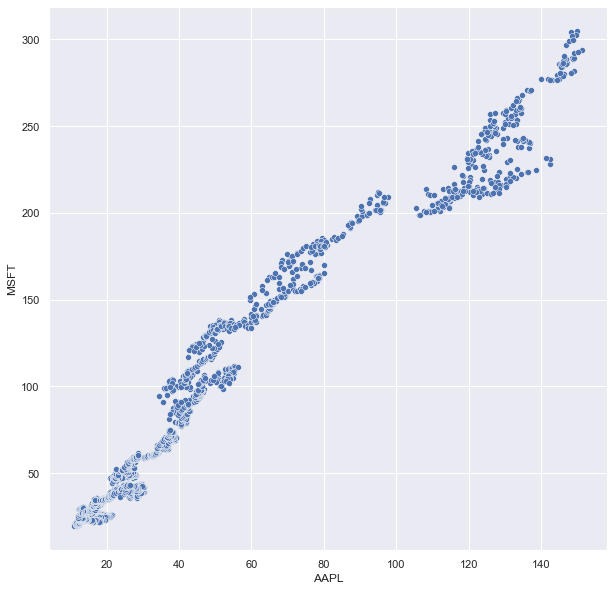

In [114]:
# 2.3: Lav et scatterplot med APPL som X-akse og MSFT som Y-akse:
plt.figure(figsize=(10,10))
sns.scatterplot(x='AAPL', y='MSFT', data=df)

*2.4: Hvad fortæller ovenstående plot os omkring forholdet mellem Apple aktier og Microsoft aktier? SVAR:*
Vi kan se at der er stor sammenhæng på prisen af Apple aktier og prisen af Microsoft aktier. Når prisen på den ene aktie er høj er prisen på den anden det også. Der synes at være et positivt lineært sammenhæng mellem de to aktier. 

<AxesSubplot:xlabel='AAPL', ylabel='WFC'>

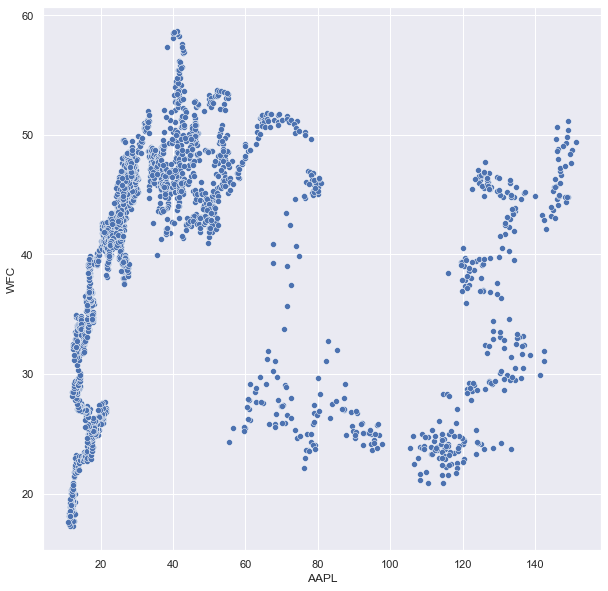

In [115]:
# 2.5: Lav et scatterplot af AAPL på X-aksen og WFC på Y-aksen:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['AAPL'], y=df['WFC'])

*2.6: Hvad fortæller ovenstående plot os omkring forholdet mellem Apple aktier og Wells Fargo aktier? SVAR:*
Her er der til gengæld ikke nogen øjensynelig sammenhæng at spotte. Dvs. prisen på Apple aktier og prisen på Wells Fargo aktier er ikke lineært sammenhængende. 

Kovarians udregnes næsten på samme måde som varians. Den eneste forskel er at i stedet for at sætte differencen vi udregnede i anden potens, ganges differencen for den ene variabel med differencen for den anden variabel:
$$cov_{x,y} = \frac{1}{n} * ((x_1 -\bar{x})(y_1 - \bar{y}) + ... + (x_i - \bar{x})(y_i - \bar{y})) = \sum_{i=1}^{n} (x_i -\bar{x})(y_i-\bar{y})$$

Her er $n$ antallet af observationer, $\bar{x}$ gennemsnittet af x og $\bar{y}$ gennemsnittet af y.

Vi kan bruge numpy eller pandas til at udregne kovariansen mellem to aktier i vores datasæt:

`np.cov(aktie1, aktie2)`
`df[[aktie1, aktie2]].cov()`

Kovariansen kan ses på den diagonal der går fra nederste venstre hjørne til øverste højre hjørne.

In [118]:
# 2.7: Udregn kovariansen mellem AAPL og WFC vha. pandas:
df[['AAPL', 'WFC']].cov()

,AAPL,WFC
AAPL,1162.610277,21.500099
WFC,21.500099,91.887329


In [119]:
# 2.8: Udregn kovariansen mellem AAPL og MSFT vha. numpy:
np.cov(df.AAPL, df.WFC)

array([[1162.61027667,   21.50009914],
       [  21.50009914,   91.88732864]])

Kovariansen kan også udregnes i pandas uden, at returnere en kovarians matrix:
`df[aktie1].cov(df[aktie2])`

In [120]:
# 2.9: Udregn kovariansen mellem AAPL og GOOG.
df.AAPL.cov(df.GOOG)

17139.70738582619

Kovariansen er ikke nem at fortolke som den er her. Derfor bruger man ofte korrelation (Pearson's R) til at skabe et mål for hvordan to variable bevæger sig i forhold til hinanden. Korrelationskoefficienten vil altid være mellem -1 og 1. Når korrelationen mellem to variable er tæt på 1 vil de bevæge sig med hinanden, dvs. i vores aktieeksempel vil de to aktier man udregner det for vil den begge gå op og ned på samme tid. Hvis korrelationen mellem to variable er tæt på -1 vil de bevæge sig modsat hinanden, dvs. i vores eksempel vil den ene aktiepris falde når den anden aktiepris stiger. 

Korrelationen udregnes ved at dividere kovariansen med produktet mellem variansen for de to variable. Korrelationen er typisk betegnet med det græske bogstav rho $\rho$:
$$\rho_{x,y} = \frac{cov_{x,y}}{\sigma_x*\sigma_y}$$

Vi kan bruge `df.corr()` til at udregne samtlige korrelationer mellem numeriske variable i et datasæt.

Vi kan ligesom med kovariansen bruge `df[aktie1].corr(df[aktie2])` til at udregne korrelationen mellem to variable.

In [121]:
# 2.10: Udregn korrelationen mellem AAPL og MSFT:
df.AAPL.corr(df.MSFT)

0.9791736021353196

In [122]:
# 2.11: Udregn korrelationkoefficienterne for alle aktier i datasættet:
df.corr()

,^GSPC,AAPL,MSFT,GOOG,KO,WFC,TSLA,BA,JNJ,AMZN,MCD
^GSPC,1.000000,0.927323,0.952115,0.978868,0.951948,0.395787,0.789789,0.703387,0.968936,0.950237,0.949743
AAPL,0.927323,1.000000,0.979174,0.948294,0.849434,0.065780,0.919775,0.458616,0.850175,0.958895,0.880212
MSFT,0.952115,0.979174,1.000000,0.968349,0.907011,0.115912,0.851861,0.562448,0.896654,0.982159,0.938907
GOOG,0.978868,0.948294,0.968349,1.000000,0.917237,0.297879,0.842756,0.620313,0.931215,0.954035,0.931824
KO,0.951948,0.849434,0.907011,0.917237,1.000000,0.402428,0.660055,0.752248,0.948216,0.898856,0.962278
WFC,0.395787,0.065780,0.115912,0.297879,0.402428,1.000000,-0.041999,0.632481,0.456879,0.134114,0.285674
TSLA,0.789789,0.919775,0.851861,0.842756,0.660055,-0.041999,1.000000,0.214133,0.684535,0.815060,0.690185
BA,0.703387,0.458616,0.562448,0.620313,0.752248,0.632481,0.214133,1.000000,0.738950,0.621917,0.765406
JNJ,0.968936,0.850175,0.896654,0.931215,0.948216,0.456879,0.684535,0.738950,1.000000,0.911136,0.941112
AMZN,0.950237,0.958895,0.982159,0.954035,0.898856,0.134114,0.815060,0.621917,0.911136,1.000000,0.951342


*2.12: Hvad fortæller de ovenstående korrelationer os omkring forholdet mellem aktierne (tag udgangspunkt i et par stykker)? SVAR:*

Det kan ses ud fra den ovenstående korrelationsmatrix at nogle af aktierne har en høj korrelation, mens andre har en korrelation tæt på nul. 

De to aktier med højst korrelation er Amazon og Microsoft. Det vil sige, at disse to aktiers priser bevæger sig i stor sammenhæng med hinanden i samme retning. Der er et positivt lineært forhold mellem de to aktier, når Apples aktiepris stiger, så gør Microsofts også. 

De to aktier med lavest korrelation er Tesla og Wells Fargo. Da korrelationen mellem disse to aktier er tæt på nul, vil det sige at der ikke er nogen øjensynelig sammenhæng mellem de to aktiers bevægelser. Vi kan ikke sige om Wells Fargo går op eller ned når Teslas aktie bevæger sig. 

Der er ikke nogen aktier med en korrelation tæt på -1. Havde der været dette ville de to aktiepriser bevæge sig modsat hinanden, og der ville være et negativt lineært forhold mellem de to aktier. 

## 3 - Visualiseringer

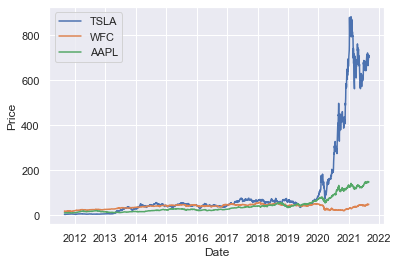

In [88]:
# 3.1: Lav lineplots med TSLA, WFC, og AAPL som y-værdier og datoen som x-akse (husk at det er indexet der holder datoen).
# For at lave flere lineplots i en, så skriver i sns.lineplot(x=df.index, y=df.aktie1) flere gange.
# Brug parametret 'label='TSLA' for Tesla aktien når i definerer lineplottet for Tesla. Gør det samme for de andre aktier.
plt.ylabel('Price')

sns.lineplot(x=df.index, y=df.TSLA, label='TSLA')
sns.lineplot(x=df.index, y=df.WFC, label='WFC')
sns.lineplot(x=df.index, y=df.AAPL, label='AAPL')

Som det kan ses er det svære at udlede noget af grafen derfor plotter man tit afkastet i stedet. Afkastet på flg. måde:
$$ \frac{x_1 - x_0}{x_0}$$

In [123]:
# 3.2: Udregn afkastet for WFC og AAPL og gem dem i variablerne:
# Følg TSLA eksemplet:
tsla_return = (df['TSLA'] - df['TSLA'].shift(-1)) / df['TSLA'].shift(-1)
wfc_return = (df.WFC - df.WFC.shift(-1)) / df.WFC.shift(-1)
aapl_return = (df.AAPL - df.AAPL.shift(-1)) / df.AAPL.shift(-1)

<AxesSubplot:xlabel='Date', ylabel='Return'>

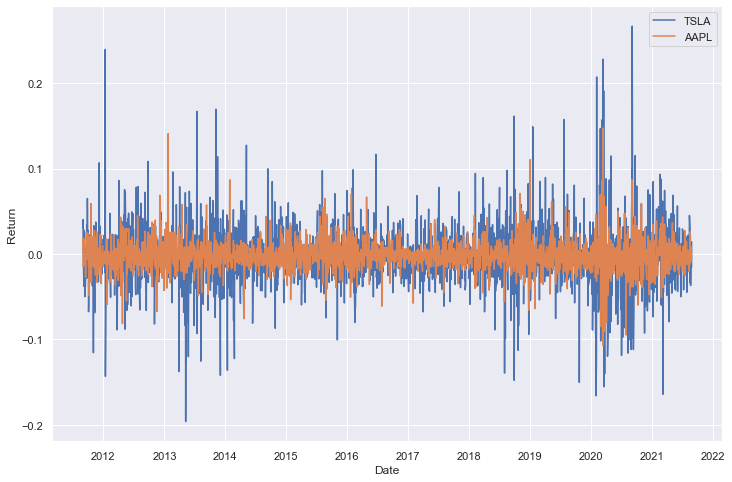

In [94]:
# 3.2: Lav lineplots med tsla_return, wfc_return, og aapl_return som y-værdier og datoen som x-akse.
plt.figure(figsize=(12,8))
plt.ylabel('Return')
sns.lineplot(x = df.index, y = tsla_return, label='TSLA')
sns.lineplot(x = df.index, y = aapl_return, label='AAPL')


*3.3: Hvad kan vi se ud fra ovenstående plots? SVAR:*
Det kan ses ud fra det ovenstående diagram at Apples og Teslas aktieafkast bevæger sig sammen. Teslas aktieafkast bevæger sig typisk med større udsving i forhold til Apples aktieafkast, men de bevæger sig i samme retning. 

Vi kan lave vores DataFrame om til at være på månedsbasis ved at bruge funktionen `df.resample('M).mean()'.

In [124]:
# Vi laver en ny DataFrame med måneds data: 
df_month = df.resample('M').mean()
df_month.head()

,^GSPC,AAPL,MSFT,GOOG,KO,WFC,TSLA,BA,JNJ,AMZN,MCD
Date,,,,,,,,,,,
2011-08-31,1218.890015,11.800762,21.408432,269.469971,25.590088,19.507246,4.948000,54.362091,49.467171,215.229996,67.959541
2011-09-30,1173.879057,12.035758,20.900620,265.091849,25.370138,18.236658,4.921905,50.986289,47.982580,223.242857,66.185201
2011-10-31,1207.216187,12.181007,21.491593,279.822347,24.521883,19.188354,5.499714,51.583706,47.962534,226.838095,67.385030
2011-11-30,1226.414772,11.800310,20.867261,296.116275,24.529705,18.685580,6.416000,53.634676,47.993344,205.480951,70.189572
2011-12-31,1243.322847,12.049162,20.850648,312.497967,25.000679,19.976301,5.996000,58.826499,48.884937,183.933811,74.253530


In [125]:
# 3.4: Udregn afkastet for TSLA, WFC og AAPL på baggrund af df_month og gem dem i variablene:
tsla_return_month = (df_month['TSLA'] - df_month['TSLA'].shift(-1))/df_month['TSLA'].shift(-1)
wfc_return_month = (df_month.WFC - df_month.WFC.shift(-1)) / df_month.WFC.shift(-1)
aapl_return_month = (df_month.AAPL - df_month.AAPL.shift(-1)) / df_month.AAPL.shift(-1)

<AxesSubplot:xlabel='Date', ylabel='Return'>

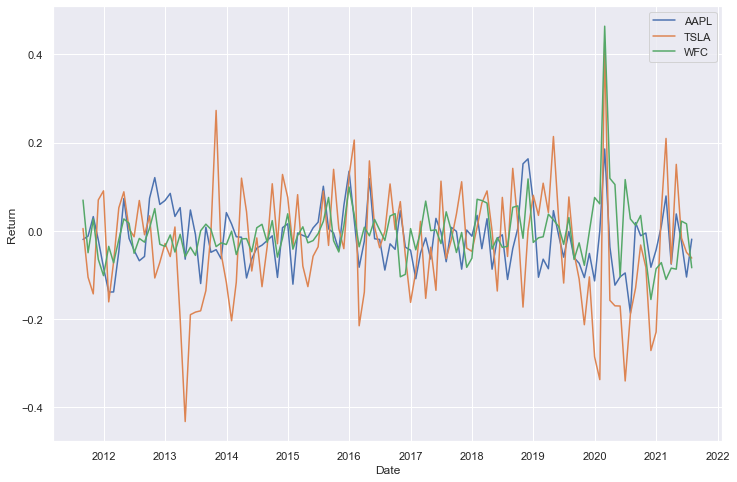

In [127]:
# 3.5: Lav lineplots med tsla_return_month, wfc_return_month, og aapl_return_month som y-værdier og datoen som x-akse.
# Husk at bruge den nye DataFrame
plt.figure(figsize=(12, 8))
plt.ylabel('Return')

sns.lineplot(x=df_month.index, y=aapl_return_month, label='AAPL')
sns.lineplot(x=df_month.index, y=tsla_return_month, label='TSLA')
sns.lineplot(x=df_month.index, y=wfc_return_month, label='WFC')

Korrelation, varians og kovarians bruges rigtig meget indenfor analysen af finansielle aktiver, såsom aktier. 
Man bruger oftest variansen af en aktie til at betegne hvor risikofyldt den givne aktie er. 